In [2]:
import pandas as pd
import warnings

In [3]:
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_columns', None)
pd.options.display.max_seq_items = 2000
warnings.filterwarnings('ignore')

In [4]:
%%html
<style>
.dataframe td {
    white-space: nowrap;
}
</style>

### Initial Datasets Import
#### Import Shipped Order Lines

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df_lines = pd.read_csv('/content/drive/MyDrive/Data Portfolio/Supply Chain Analytics/order_lines.csv', index_col = 0)
print("{:,} order lines to process".format(len(df_lines)))
df_lines.head()

5,208 order lines to process


,Date,Month-Year,Warehouse Code,Customer Code,Order Number,Order Line Number,Item Code,Units,Euros
112,2021-01-04 00:00:00.000,1-2021,3403434,5002915-15,20247100,1,963543-43,2.0,381.47
14485,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,1,8902753-53,250.0,187.03
14486,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,2,8308591-91,500.0,452.45
14487,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,3,8308621-21,500.0,452.45
14488,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,4,8022921-21,400.0,567.16


#### Import Master Data: Unit of Measure Conversions to (kg)

In [7]:
df_uom = pd.read_csv('/content/drive/MyDrive/Data Portfolio/Supply Chain Analytics/uom_conversions.csv', index_col = 0)
print("{:,} Unit of Measure Conversions".format(len(df_uom)))

# Join
df_join = df_lines.copy()
COLS_JOIN = ['Item Code']
df_join = pd.merge(df_join, df_uom, on=COLS_JOIN, how='left', suffixes=('', '_y'))
df_join.drop(df_join.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
print("{:,} records".format(len(df_join)))
df_join.head()

557 Unit of Measure Conversions
5,208 records


,Date,Month-Year,Warehouse Code,Customer Code,Order Number,Order Line Number,Item Code,Units,Euros,Conversion Ratio
0,2021-01-04 00:00:00.000,1-2021,3403434,5002915-15,20247100,1,963543-43,2.0,381.47,56.58400
1,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,1,8902753-53,250.0,187.03,0.03200
2,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,2,8308591-91,500.0,452.45,0.02219
3,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,3,8308621-21,500.0,452.45,0.02219
4,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,4,8022921-21,400.0,567.16,0.03200


#### Import Distances

In [8]:
df_dist = pd.read_csv('/content/drive/MyDrive/Data Portfolio/Supply Chain Analytics/distances.csv', index_col = 0)
# Location
df_dist['Location'] = df_dist['Customer Country'].astype(str) + ', ' + df_dist['Customer City'].astype(str)
df_dist.head()

,Warehouse Code,Warehouse Name,Warehouse Country,Warehouse City,Customer Code,Customer Country,Customer City,Road,Rail,Sea,Air,Location
19,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5002915-15,FRANCE,LES ANGLES,765.728,0.0,0.0,0.0,"FRANCE, LES ANGLES"
610,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5397843-43,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE"
676,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340669-69,GERMANY,PEINE - WOLTORF,856.000,0.0,0.0,0.0,"GERMANY, PEINE - WOLTORF"
682,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340672-72,FRANCE,BELLEVILLE,52.694,0.0,0.0,0.0,"FRANCE, BELLEVILLE"
1375,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5029913-13,FRANCE,MOISSY-CRAMAYEL,288.437,0.0,0.0,0.0,"FRANCE, MOISSY-CRAMAYEL"


#### Import Cities GPS Locations

In [9]:
df_gps = pd.read_csv('/content/drive/MyDrive/Data Portfolio/Supply Chain Analytics/gps_locations.csv', index_col = 0)
print("{:,} Locations".format(len(df_gps)))
df_gps.head()

19 Locations


,Location,GPS 1,GPS 2
867,"BULGARIA, DOLNI BOGROV",42.701462,23.490811
1087,"FRANCE, AUBROMETZ",50.303749,2.176058
1153,"FRANCE, BELLEVILLE",48.871184,2.386682
1371,"FRANCE, CLICHY CEDEX",48.904099,2.304123
1534,"FRANCE, GAEL",48.116682,-2.234640


### Data Processing
#### Merge Distance with GPS Locations

In [10]:
df_dist = pd.merge(df_dist, df_gps, on='Location', how='left', suffixes=('', '_y'))
df_dist.drop(df_dist.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
df_dist

,Warehouse Code,Warehouse Name,Warehouse Country,Warehouse City,Customer Code,Customer Country,Customer City,Road,Rail,Sea,Air,Location,GPS 1,GPS 2
0,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5002915-15,FRANCE,LES ANGLES,765.728,0.0,0.0,0.0,"FRANCE, LES ANGLES",42.579678,2.048950
1,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5397843-43,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.768810,2.537369
2,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340669-69,GERMANY,PEINE - WOLTORF,856.000,0.0,0.0,0.0,"GERMANY, PEINE - WOLTORF",52.304594,10.312521
3,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340672-72,FRANCE,BELLEVILLE,52.694,0.0,0.0,0.0,"FRANCE, BELLEVILLE",48.871184,2.386682
4,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5029913-13,FRANCE,MOISSY-CRAMAYEL,288.437,0.0,0.0,0.0,"FRANCE, MOISSY-CRAMAYEL",48.624666,2.595756
5,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5003451-51,FRANCE,LEVALLOIS PERRET,295.165,0.0,0.0,0.0,"FRANCE, LEVALLOIS PERRET",48.894640,2.287419
6,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5293132-32,FRANCE,HERLIN LE SEC,353.590,0.0,0.0,0.0,"FRANCE, HERLIN LE SEC",50.354429,2.331766
7,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5003269-69,FRANCE,MACON,478.723,0.0,0.0,0.0,"FRANCE, MACON",48.878552,2.280117
8,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5003474-74,FRANCE,ORLY,287.110,0.0,0.0,0.0,"FRANCE, ORLY",48.740227,2.402965
9,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5003476-76,FRANCE,VITRY SUR SEINE,284.851,0.0,0.0,0.0,"FRANCE, VITRY SUR SEINE",48.789263,2.395103


#### Final Join to build records

In [11]:
COLS_JOIN = ['Warehouse Code', 'Customer Code']
df_join = pd.merge(df_join, df_dist, on = COLS_JOIN, how='left', suffixes=('', '_y'))
df_join.drop(df_join.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
print("{:,} records".format(len(df_join)))
df_join

5,208 records


,Date,Month-Year,Warehouse Code,Customer Code,Order Number,Order Line Number,Item Code,Units,Euros,Conversion Ratio,Warehouse Name,Warehouse Country,Warehouse City,Customer Country,Customer City,Road,Rail,Sea,Air,Location,GPS 1,GPS 2
0,2021-01-04 00:00:00.000,1-2021,3403434,5002915-15,20247100,1,963543-43,2.0,381.47,56.58400,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,FRANCE,LES ANGLES,765.728,0.0,0.0,0.0,"FRANCE, LES ANGLES",42.579678,2.048950
1,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,1,8902753-53,250.0,187.03,0.03200,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.768810,2.537369
2,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,2,8308591-91,500.0,452.45,0.02219,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.768810,2.537369
3,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,3,8308621-21,500.0,452.45,0.02219,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.768810,2.537369
4,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,4,8022921-21,400.0,567.16,0.03200,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.768810,2.537369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5203,2021-10-28 00:00:00.000,10-2021,3403434,5397843-43,21089497,84,802065-65,80.0,72.96,0.02200,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.768810,2.537369
5204,2021-10-28 00:00:00.000,10-2021,3403434,5397843-43,21089497,85,942082-82,200.0,391.88,0.03200,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.768810,2.537369
5205,2021-10-28 00:00:00.000,10-2021,3403434,5397843-43,21089497,86,8022922-22,400.0,581.40,0.03200,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.768810,2.537369
5206,2021-11-01 00:00:00.000,10-2021,3403434,5340669-69,21004473,1,982884-84,2000.0,2980.00,0.14600,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,GERMANY,PEINE - WOLTORF,856.000,0.0,0.0,0.0,"GERMANY, PEINE - WOLTORF",52.304594,10.312521


In [15]:
df_line

,Date,Month-Year,Warehouse Code,Customer Code,Order Number,Order Line Number,Item Code,Units,Euros,Conversion Ratio,Warehouse Name,Warehouse Country,Warehouse City,Customer Country,Customer City,Road,Rail,Sea,Air,Location,GPS 1,GPS 2
0,2021-01-04 00:00:00.000,1-2021,3403434,5002915-15,20247100,1,963543-43,2.0,381.47,56.58400,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,FRANCE,LES ANGLES,765.728,0.0,0.0,0.0,"FRANCE, LES ANGLES",42.579678,2.048950
1,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,1,8902753-53,250.0,187.03,0.03200,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.768810,2.537369
2,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,2,8308591-91,500.0,452.45,0.02219,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.768810,2.537369
3,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,3,8308621-21,500.0,452.45,0.02219,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.768810,2.537369
4,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,4,8022921-21,400.0,567.16,0.03200,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.768810,2.537369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5203,2021-10-28 00:00:00.000,10-2021,3403434,5397843-43,21089497,84,802065-65,80.0,72.96,0.02200,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.768810,2.537369
5204,2021-10-28 00:00:00.000,10-2021,3403434,5397843-43,21089497,85,942082-82,200.0,391.88,0.03200,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.768810,2.537369
5205,2021-10-28 00:00:00.000,10-2021,3403434,5397843-43,21089497,86,8022922-22,400.0,581.40,0.03200,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.768810,2.537369
5206,2021-11-01 00:00:00.000,10-2021,3403434,5340669-69,21004473,1,982884-84,2000.0,2980.00,0.14600,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,GERMANY,PEINE - WOLTORF,856.000,0.0,0.0,0.0,"GERMANY, PEINE - WOLTORF",52.304594,10.312521


### Calculation at order line level

In [18]:
# Calculation @ line level
df_line = df_join.copy()
df_line['KG'] = df_line['Units'] * df_line['Conversion Ratio']
df_line.head()



,Date,Month-Year,Warehouse Code,Customer Code,Order Number,Order Line Number,Item Code,Units,Euros,Conversion Ratio,Warehouse Name,Warehouse Country,Warehouse City,Customer Country,Customer City,Road,Rail,Sea,Air,Location,GPS 1,GPS 2,KG
0,2021-01-04 00:00:00.000,1-2021,3403434,5002915-15,20247100,1,963543-43,2.0,381.47,56.58400,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,FRANCE,LES ANGLES,765.728,0.0,0.0,0.0,"FRANCE, LES ANGLES",42.579678,2.048950,113.168
1,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,1,8902753-53,250.0,187.03,0.03200,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.768810,2.537369,8.000
2,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,2,8308591-91,500.0,452.45,0.02219,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.768810,2.537369,11.095
3,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,3,8308621-21,500.0,452.45,0.02219,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.768810,2.537369,11.095
4,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,4,8022921-21,400.0,567.16,0.03200,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.768810,2.537369,12.800


In [20]:
dict_co2e = dict(zip(['Air' ,'Sea', 'Road', 'Rail'], [2.1, 0.01, 0.096, 0.028]))
MODES = ['Road', 'Rail','Sea', 'Air']
for mode in MODES:
    df_line['CO2 ' + mode] = df_line['KG'].astype(float)/1000 * df_line[mode].astype(float) * dict_co2e[mode]
df_line['CO2 Total'] = df_line[['CO2 ' + mode for mode in MODES]].sum(axis = 1)
df_line.to_csv('detailed_report.csv')
df_line.head()

,Date,Month-Year,Warehouse Code,Customer Code,Order Number,Order Line Number,Item Code,Units,Euros,Conversion Ratio,Warehouse Name,Warehouse Country,Warehouse City,Customer Country,Customer City,Road,Rail,Sea,Air,Location,GPS 1,GPS 2,KG,CO2 Road,CO2 Rail,CO2 Sea,CO2 Air,CO2 Total
0,2021-01-04 00:00:00.000,1-2021,3403434,5002915-15,20247100,1,963543-43,2.0,381.47,56.58400,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,FRANCE,LES ANGLES,765.728,0.0,0.0,0.0,"FRANCE, LES ANGLES",42.579678,2.048950,113.168,8.318967,0.0,0.0,0.0,8.318967
1,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,1,8902753-53,250.0,187.03,0.03200,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.768810,2.537369,8.000,0.216183,0.0,0.0,0.0,0.216183
2,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,2,8308591-91,500.0,452.45,0.02219,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.768810,2.537369,11.095,0.299818,0.0,0.0,0.0,0.299818
3,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,3,8308621-21,500.0,452.45,0.02219,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.768810,2.537369,11.095,0.299818,0.0,0.0,0.0,0.299818
4,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,4,8022921-21,400.0,567.16,0.03200,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.768810,2.537369,12.800,0.345892,0.0,0.0,0.0,0.345892


### Calculation at order level

In [21]:
# Calculate Weight (KG)
df_join['KG'] = df_join['Units'] * df_join['Conversion Ratio']

# Agg by order
GPBY_ORDER = ['Date', 'Month-Year',
        'Warehouse Code', 'Warehouse Name', 'Warehouse Country', 'Warehouse City',
        'Customer Code', 'Customer Country', 'Customer City','Location', 'GPS 1', 'GPS 2',
        'Road', 'Rail', 'Sea', 'Air',
        'Order Number']
df_agg = pd.DataFrame(df_join.groupby(GPBY_ORDER)[['Units', 'KG']].sum())
df_agg.reset_index(inplace = True)
df_agg.head()

,Date,Month-Year,Warehouse Code,Warehouse Name,Warehouse Country,Warehouse City,Customer Code,Customer Country,Customer City,Location,GPS 1,GPS 2,Road,Rail,Sea,Air,Order Number,Units,KG
0,2021-01-04 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5002915-15,FRANCE,LES ANGLES,"FRANCE, LES ANGLES",42.579678,2.048950,765.728,0.0,0.0,0.0,20247100,2.0,113.16800
1,2021-01-07 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340669-69,GERMANY,PEINE - WOLTORF,"GERMANY, PEINE - WOLTORF",52.304594,10.312521,856.000,0.0,0.0,0.0,20203388,153.0,2530.32471
2,2021-01-07 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340672-72,FRANCE,BELLEVILLE,"FRANCE, BELLEVILLE",48.871184,2.386682,52.694,0.0,0.0,0.0,20203383,128.0,2116.87296
3,2021-01-07 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5397843-43,FRANCE,SUCY EN BRIE,"FRANCE, SUCY EN BRIE",48.768810,2.537369,281.488,0.0,0.0,0.0,20258239,2771.0,71.45232
4,2021-01-08 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5003451-51,FRANCE,LEVALLOIS PERRET,"FRANCE, LEVALLOIS PERRET",48.894640,2.287419,295.165,0.0,0.0,0.0,21000061,2125.0,111.95200


#### Calculate CO2 = f(KG, Ratios)

In [22]:
# CO2 Emissions
dict_co2e = dict(zip(['Air' ,'Sea', 'Road', 'Rail'], [2.1, 0.01, 0.096, 0.028]))
MODES = ['Road', 'Rail','Sea', 'Air']
for mode in MODES:
    df_agg['CO2 ' + mode] = df_agg['KG'].astype(float)/1000 * df_agg[mode].astype(float) * dict_co2e[mode]
df_agg['CO2 Total'] = df_agg[['CO2 ' + mode for mode in MODES]].sum(axis = 1)
df_agg.head()

,Date,Month-Year,Warehouse Code,Warehouse Name,Warehouse Country,Warehouse City,Customer Code,Customer Country,Customer City,Location,GPS 1,GPS 2,Road,Rail,Sea,Air,Order Number,Units,KG,CO2 Road,CO2 Rail,CO2 Sea,CO2 Air,CO2 Total
0,2021-01-04 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5002915-15,FRANCE,LES ANGLES,"FRANCE, LES ANGLES",42.579678,2.048950,765.728,0.0,0.0,0.0,20247100,2.0,113.16800,8.318967,0.0,0.0,0.0,8.318967
1,2021-01-07 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340669-69,GERMANY,PEINE - WOLTORF,"GERMANY, PEINE - WOLTORF",52.304594,10.312521,856.000,0.0,0.0,0.0,20203388,153.0,2530.32471,207.931963,0.0,0.0,0.0,207.931963
2,2021-01-07 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340672-72,FRANCE,BELLEVILLE,"FRANCE, BELLEVILLE",48.871184,2.386682,52.694,0.0,0.0,0.0,20203383,128.0,2116.87296,10.708464,0.0,0.0,0.0,10.708464
3,2021-01-07 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5397843-43,FRANCE,SUCY EN BRIE,"FRANCE, SUCY EN BRIE",48.768810,2.537369,281.488,0.0,0.0,0.0,20258239,2771.0,71.45232,1.930845,0.0,0.0,0.0,1.930845
4,2021-01-08 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5003451-51,FRANCE,LEVALLOIS PERRET,"FRANCE, LEVALLOIS PERRET",48.894640,2.287419,295.165,0.0,0.0,0.0,21000061,2125.0,111.95200,3.172254,0.0,0.0,0.0,3.172254


#### Final mapping for visualization

In [23]:
# Mapping the delivery Mode
df_agg['Delivery Mode'] = df_agg[MODES].astype(float).apply(
    lambda t: [mode if t[mode]>0 else '-' for mode in MODES], axis = 1)
dict_map = dict(zip(df_agg['Delivery Mode'].astype(str).unique(),
  [i.replace(", '-'",'').replace("'-'",'').replace("'",'') for i in df_agg['Delivery Mode'].astype(str).unique()]))
df_agg['Delivery Mode'] = df_agg['Delivery Mode'].astype(str).map(dict_map)
df_agg

,Date,Month-Year,Warehouse Code,Warehouse Name,Warehouse Country,Warehouse City,Customer Code,Customer Country,Customer City,Location,GPS 1,GPS 2,Road,Rail,Sea,Air,Order Number,Units,KG,CO2 Road,CO2 Rail,CO2 Sea,CO2 Air,CO2 Total,Delivery Mode
0,2021-01-04 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5002915-15,FRANCE,LES ANGLES,"FRANCE, LES ANGLES",42.579678,2.048950,765.728,0.0,0.0,0.0,20247100,2.0,113.16800,8.318967,0.0,0.000000,0.0,8.318967,[Road]
1,2021-01-07 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340669-69,GERMANY,PEINE - WOLTORF,"GERMANY, PEINE - WOLTORF",52.304594,10.312521,856.000,0.0,0.0,0.0,20203388,153.0,2530.32471,207.931963,0.0,0.000000,0.0,207.931963,[Road]
2,2021-01-07 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340672-72,FRANCE,BELLEVILLE,"FRANCE, BELLEVILLE",48.871184,2.386682,52.694,0.0,0.0,0.0,20203383,128.0,2116.87296,10.708464,0.0,0.000000,0.0,10.708464,[Road]
3,2021-01-07 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5397843-43,FRANCE,SUCY EN BRIE,"FRANCE, SUCY EN BRIE",48.768810,2.537369,281.488,0.0,0.0,0.0,20258239,2771.0,71.45232,1.930845,0.0,0.000000,0.0,1.930845,[Road]
4,2021-01-08 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5003451-51,FRANCE,LEVALLOIS PERRET,"FRANCE, LEVALLOIS PERRET",48.894640,2.287419,295.165,0.0,0.0,0.0,21000061,2125.0,111.95200,3.172254,0.0,0.000000,0.0,3.172254,[Road]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,2021-10-26 00:00:00.000,10-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340672-72,FRANCE,BELLEVILLE,"FRANCE, BELLEVILLE",48.871184,2.386682,52.694,0.0,0.0,0.0,21004398,9040.0,416.74880,2.108175,0.0,0.000000,0.0,2.108175,[Road]
287,2021-10-27 00:00:00.000,10-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5029913-13,FRANCE,MOISSY-CRAMAYEL,"FRANCE, MOISSY-CRAMAYEL",48.624666,2.595756,288.437,0.0,0.0,0.0,21089663,13515.0,493.52420,13.665661,0.0,0.000000,0.0,13.665661,[Road]
288,2021-10-27 00:00:00.000,10-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5334855-55,UNITED KINGDOM,KENT,"UNITED KINGDOM, KENT",51.196396,0.742644,409.000,0.0,44.0,0.0,21009276,450.0,35.34930,1.387955,0.0,0.015554,0.0,1.403509,"[Road, Sea]"
289,2021-10-28 00:00:00.000,10-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5397843-43,FRANCE,SUCY EN BRIE,"FRANCE, SUCY EN BRIE",48.768810,2.537369,281.488,0.0,0.0,0.0,21089497,11831.0,367.71380,9.936674,0.0,0.000000,0.0,9.936674,[Road]


In [24]:
# Save Final Report
df_agg.to_csv('final_report.csv')

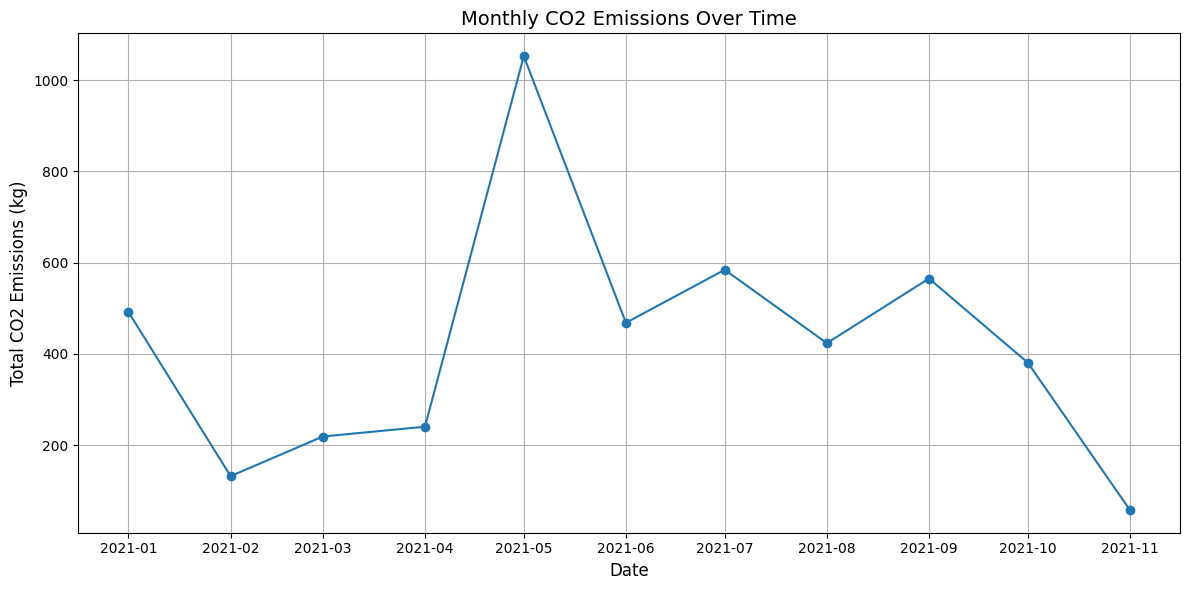

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (ensure this is pointing to your actual file location)
df = pd.read_csv('final_report.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract Year and Month for grouping
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Group by Year and Month to calculate total emissions
monthly_emissions = df.groupby(['Year', 'Month'])['CO2 Total'].sum().reset_index()

# Create a time-series index for plotting
monthly_emissions['Date'] = pd.to_datetime(monthly_emissions[['Year', 'Month']].assign(Day=1))

# Plotting the trends over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_emissions['Date'], monthly_emissions['CO2 Total'], marker='o')
plt.title('Monthly CO2 Emissions Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total CO2 Emissions (kg)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


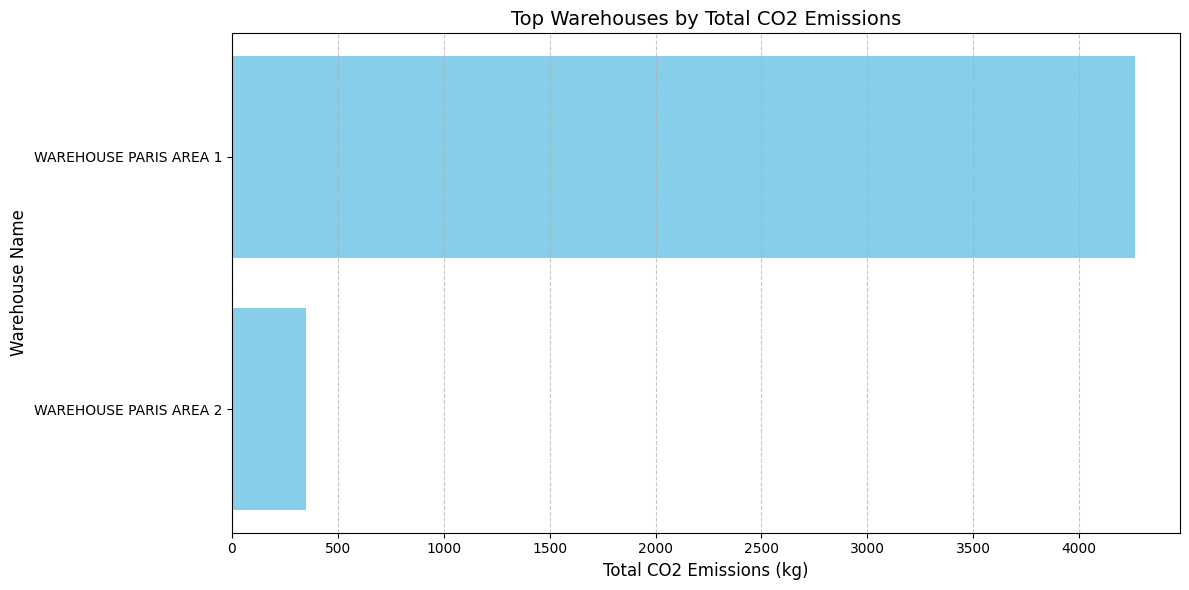

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df_we = pd.read_csv('final_report.csv')

# Group by warehouse to calculate total emissions
warehouse_emissions = df_we.groupby('Warehouse Name')['CO2 Total'].sum().reset_index()

# Sort by emissions in descending order
warehouse_emissions = warehouse_emissions.sort_values(by='CO2 Total', ascending=False)

# Top 10 warehouses by emissions
top_warehouses = warehouse_emissions.head(10)

# Plot the results
plt.figure(figsize=(12, 6))
plt.barh(top_warehouses['Warehouse Name'], top_warehouses['CO2 Total'], color='skyblue')
plt.title('Top Warehouses by Total CO2 Emissions', fontsize=14)
plt.xlabel('Total CO2 Emissions (kg)', fontsize=12)
plt.ylabel('Warehouse Name', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


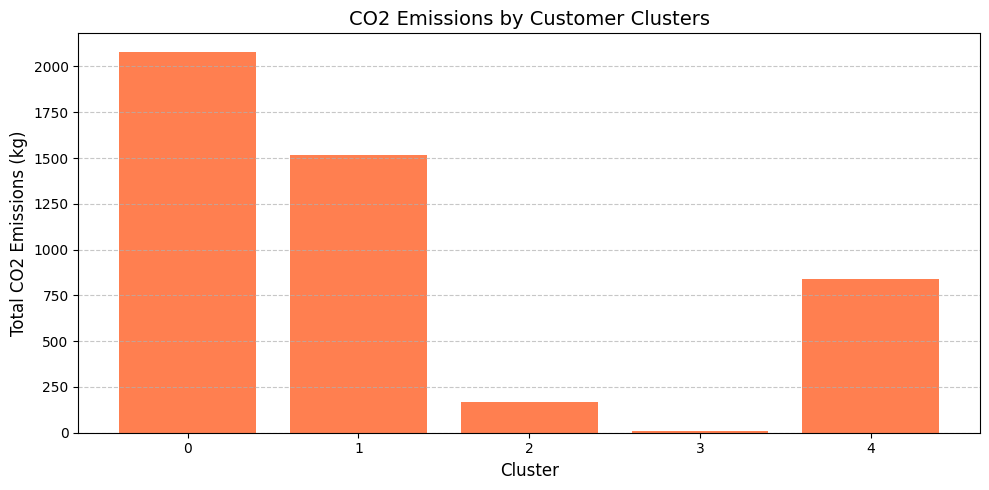

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Filter necessary columns for clustering
customer_data = df[['Customer City', 'GPS 1', 'GPS 2', 'CO2 Total']].dropna()

# Normalize the data for clustering
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(customer_data[['GPS 1', 'GPS 2', 'CO2 Total']])

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Analyze cluster-wise emissions
cluster_emissions = customer_data.groupby('Cluster')['CO2 Total'].sum().reset_index()

# Plot the results
plt.figure(figsize=(10, 5))
plt.bar(cluster_emissions['Cluster'], cluster_emissions['CO2 Total'], color='coral')
plt.title('CO2 Emissions by Customer Clusters', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Total CO2 Emissions (kg)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Save cluster assignments for further analysis
customer_data.to_csv('customer_clusters.csv', index=False)


In [30]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd

# Load your dataset
df_mapping = pd.read_csv('final_report.csv')

# Filter necessary columns and drop rows with missing GPS data
df_clean = df_mapping[['Warehouse Name', 'Customer City', 'GPS 1', 'GPS 2', 'CO2 Total', 'Road']].dropna()

# Create a base map
m = folium.Map(location=[46.2276, 2.2137], zoom_start=5)  # Centered around France (adjust as needed)

# Add a marker cluster to group nearby points
marker_cluster = MarkerCluster().add_to(m)

# Function to dynamically assign colors based on CO2 emissions
def get_color(co2):
    if co2 <= 50:
        return 'green'  # Low emissions
    elif 50 < co2 <= 200:
        return 'orange'  # Medium emissions
    else:
        return 'red'  # High emissions

# Iterate through the DataFrame and add lines and markers
for index, row in df.iterrows():
    # Starting point (Warehouse)
    warehouse_coords = [row['GPS 1'], row['GPS 2']]

    # Add warehouse marker
    folium.Marker(
        location=warehouse_coords,
        popup=f"Warehouse: {row['Warehouse Name']}<br>CO2: {row['CO2 Total']:.2f} kg",
        icon=folium.Icon(color='blue', icon='home')
    ).add_to(marker_cluster)

    # Simulate Customer location based on hypothetical customer locations (add actual GPS if available)
    customer_coords = [
        row['GPS 1'] + (0.01 if row['Road'] > 0 else -0.01),  # Adjust for example purposes
        row['GPS 2'] + (0.01 if row['Road'] > 0 else -0.01)
    ]

    # Add customer marker
    folium.Marker(
        location=customer_coords,
        popup=f"Customer City: {row['Customer City']}<br>CO2: {row['CO2 Total']:.2f} kg",
        icon=folium.Icon(color='green', icon='info-sign')
    ).add_to(marker_cluster)

    # Add a line connecting the warehouse to the customer
    folium.PolyLine(
        locations=[warehouse_coords, customer_coords],
        color=get_color(row['CO2 Total']),  # Use dynamic coloring based on CO2
        weight=2,
        tooltip=f"Route CO2: {row['CO2 Total']:.2f} kg"
    ).add_to(m)

# Save the map to an HTML file
m.save('shipment_routes_emissions_map_dynamic.html')

# Display map in the notebook (optional)
m


In [33]:
import pandas as pd

# Load your dataset
df_ekpi = pd.read_csv('final_report.csv')

# Ensure necessary columns are available
df_ekpi_clean = df_ekpi[['Order Number', 'Road', 'KG', 'CO2 Total', 'Units']].dropna()

# Convert distances to kilometers and weights to tons for ton-km calculations
df_ekpi_clean['Road_km'] = df_ekpi_clean['Road']  # Assuming 'Road' is in kilometers
df_ekpi_clean['Weight_tons'] = df_ekpi_clean['KG'] / 1000  # Convert kg to tons

# Calculate Emission Intensity KPIs
df_ekpi_clean['CO2 per ton-km'] = df_ekpi_clean['CO2 Total'] / (df_ekpi_clean['Weight_tons'] * df_ekpi_clean['Road_km'])
df_ekpi_clean['CO2 per order'] = df_ekpi_clean['CO2 Total'] / df_ekpi_clean['Units']

# Replace infinite values with NaN for rows where weight or distance is zero
df_ekpi_clean.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Drop NaN rows resulting from zero division (if any)
df_ekpi_clean.dropna(subset=['CO2 per ton-km', 'CO2 per order'], inplace=True)

# Save the updated dataset with KPIs
df_ekpi_clean.to_csv('emission_intensity_kpis.csv', index=False)

# Summary statistics for the KPIs
kpi_summary = df_ekpi_clean[['CO2 per ton-km', 'CO2 per order']].describe()

# Display KPI summary
print(kpi_summary)


       CO2 per ton-km  CO2 per order
count  290.000000      290.000000   
mean   0.096455        0.103626     
std    0.007319        0.496650     
min    0.096000        0.000147     
25%    0.096000        0.000956     
50%    0.096000        0.001371     
75%    0.096000        0.002652     
max    0.220633        4.159484     


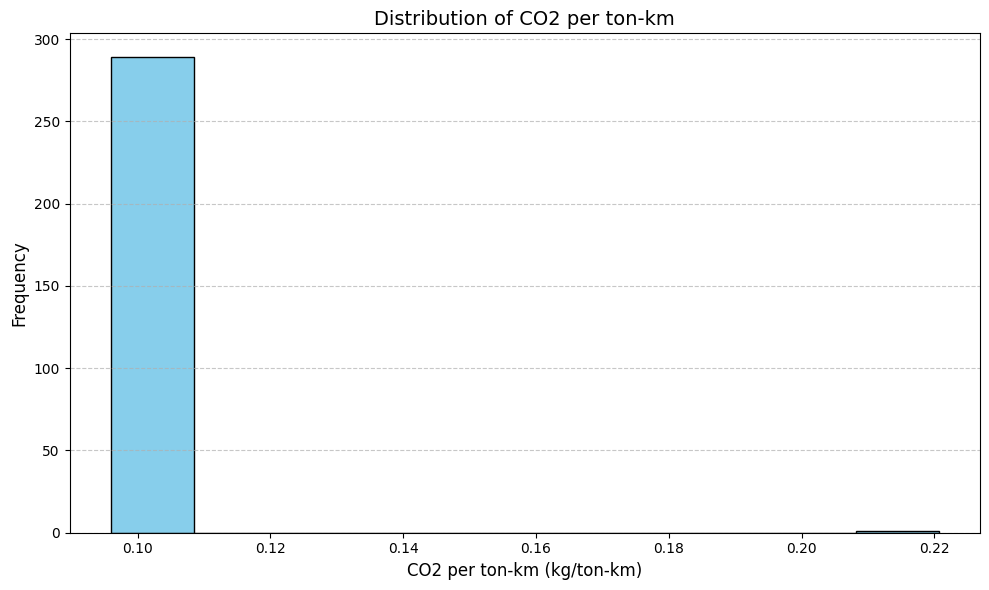

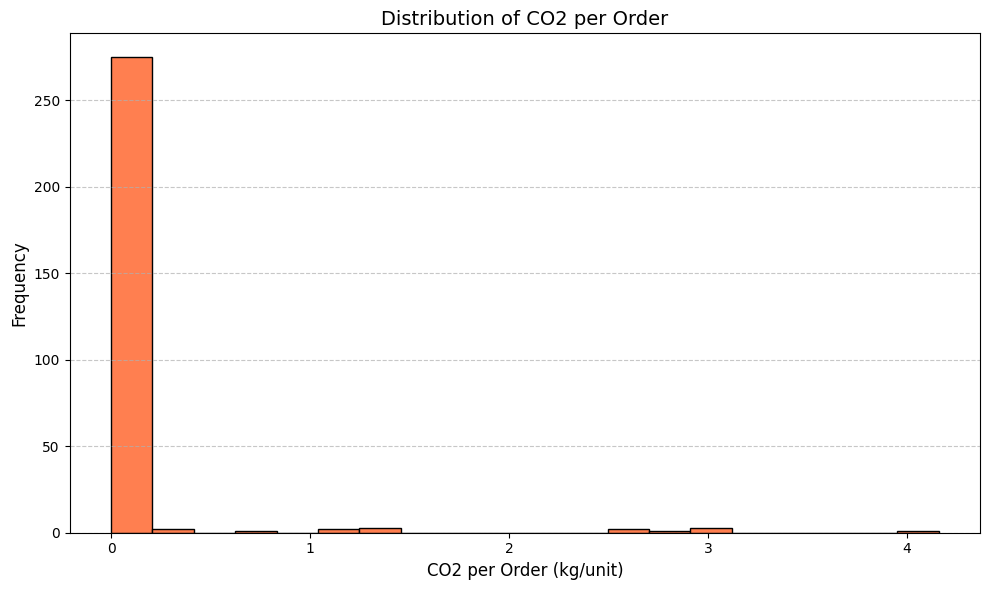

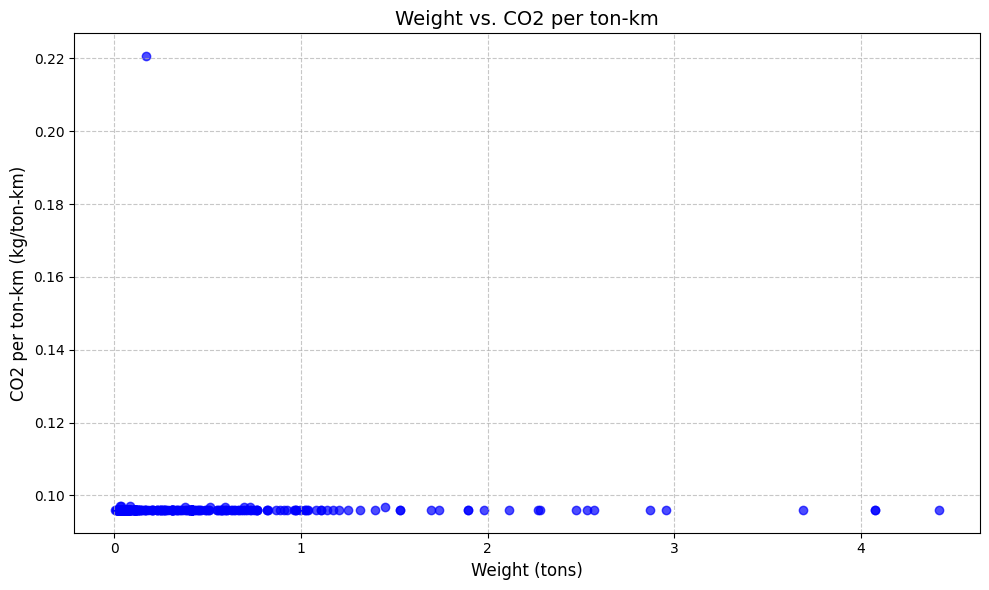

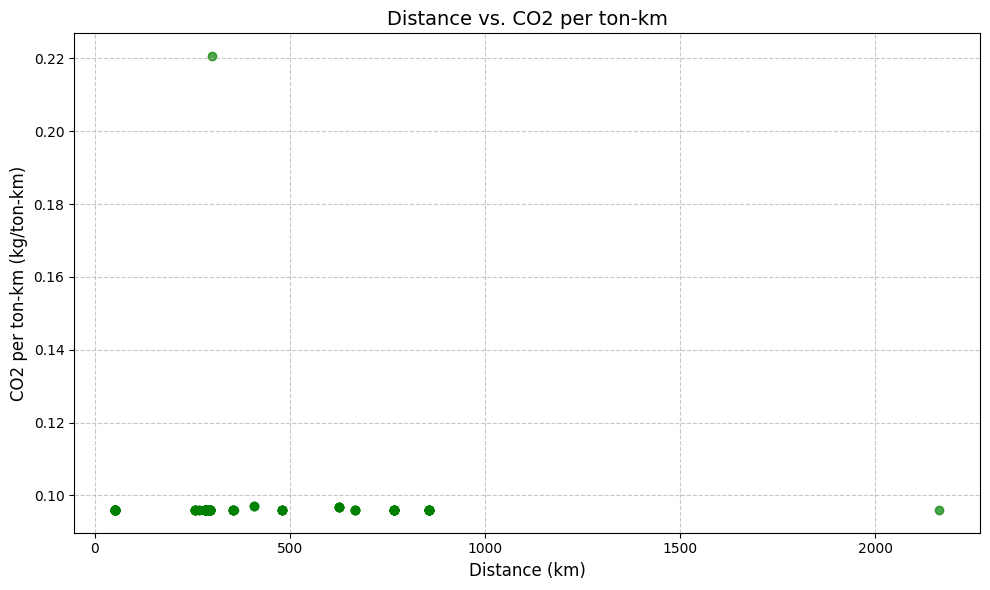

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset with calculated KPIs
emission_data = pd.read_csv('emission_intensity_kpis.csv')

# Histogram for CO2 per ton-km
plt.figure(figsize=(10, 6))
plt.hist(emission_data['CO2 per ton-km'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of CO2 per ton-km', fontsize=14)
plt.xlabel('CO2 per ton-km (kg/ton-km)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Histogram for CO2 per order
plt.figure(figsize=(10, 6))
plt.hist(emission_data['CO2 per order'], bins=20, color='coral', edgecolor='black')
plt.title('Distribution of CO2 per Order', fontsize=14)
plt.xlabel('CO2 per Order (kg/unit)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Scatter plot: Weight (tons) vs. CO2 per ton-km
plt.figure(figsize=(10, 6))
plt.scatter(emission_data['Weight_tons'], emission_data['CO2 per ton-km'], alpha=0.7, color='blue')
plt.title('Weight vs. CO2 per ton-km', fontsize=14)
plt.xlabel('Weight (tons)', fontsize=12)
plt.ylabel('CO2 per ton-km (kg/ton-km)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Scatter plot: Distance (km) vs. CO2 per ton-km
plt.figure(figsize=(10, 6))
plt.scatter(emission_data['Road_km'], emission_data['CO2 per ton-km'], alpha=0.7, color='green')
plt.title('Distance vs. CO2 per ton-km', fontsize=14)
plt.xlabel('Distance (km)', fontsize=12)
plt.ylabel('CO2 per ton-km (kg/ton-km)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [37]:
import pandas as pd

# Load data
emission_data = pd.read_csv('emission_intensity_kpis.csv')

# Aggregating Environmental Metrics
esg_report = {
    'Total CO2 Emissions (kg)': emission_data['CO2 Total'].sum(),
    'Average CO2 per Order (kg/unit)': emission_data['CO2 per order'].mean(),
    'Average CO2 per Ton-KM': emission_data['CO2 per ton-km'].mean(),
    'Total Weight Shipped (tons)': emission_data['Weight_tons'].sum(),
    'Total Distance (km)': emission_data['Road_km'].sum()
}

esg_report_df = pd.DataFrame.from_dict(esg_report, orient='index', columns=['Metric Value'])

# Save ESG Report to CSV
esg_report_df.to_csv('esg_environmental_report.csv')

# Display the report
print(esg_report_df)


                                  Metric Value
Total CO2 Emissions (kg)         4613.917694  
Average CO2 per Order (kg/unit)  0.103626     
Average CO2 per Ton-KM           0.096455     
Total Weight Shipped (tons)      133.556051   
Total Distance (km)              100574.885000
